In [101]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [102]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    m = X.shape[0]
    for i in range(m):
        distances = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distances.append(norm_ij)
        idx[i] = np.argmin(distances)
     ### END CODE HERE ###
    
    return idx

In [103]:
X = load_data()

In [104]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)


First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [105]:
#Select an initial set of centroids (3 Centroids)
intial_centroids = np.array([[3,3], [6,2], [8,5]])

#Find the closes centroids using inital centroids
idx = find_closest_centroids(X, intial_centroids)

print("First three elements in idx are:", idx[:3])


First three elements in idx are: [0 2 1]


In [106]:
 from public_tests import *

find_closest_centroids_test(find_closest_centroids)

All tests passed!


In [107]:
def compute_centroids(X, idx, K):

    m, n = X.shape

    centroids = np.zeros((K, n))
    

    for i in range(K):
        points = X[idx == i]
        centroids[i] = np.mean(points, axis = 0)

    return centroids
        

In [108]:
K = 3

centroids = compute_centroids(X, idx, K)

print("The centroids are : " , centroids)

compute_centroids_test(compute_centroids)

The centroids are :  [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


In [109]:

def run_kMeans( X, initial_centroids, max_iters = 10, plot_progress = False):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize = (8,6))

    for i in range(max_iters):

        print("K-Means iteration %d/%d" % (i, max_iters-1))

        idx = find_closest_centroids(X, centroids)

        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids , idx , K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)

    plt.show()

    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


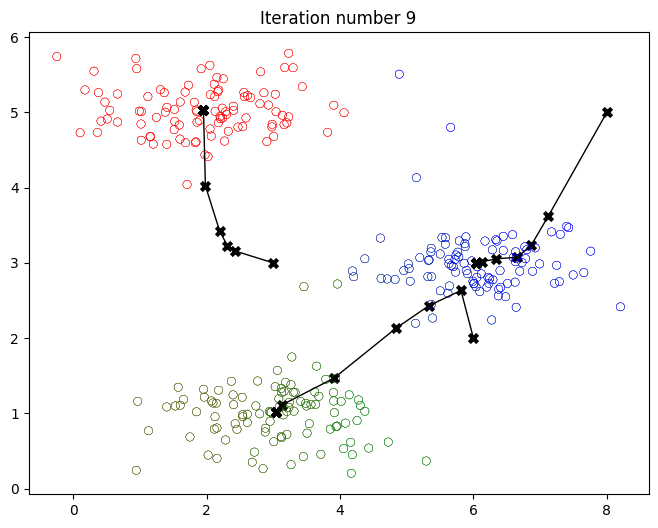

In [110]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)


In [111]:
def kMeans_init_centroids(X, k):

    randidx = np.random.permutation(X.shape[0])

    centroids = X[randidx[:K]]

    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


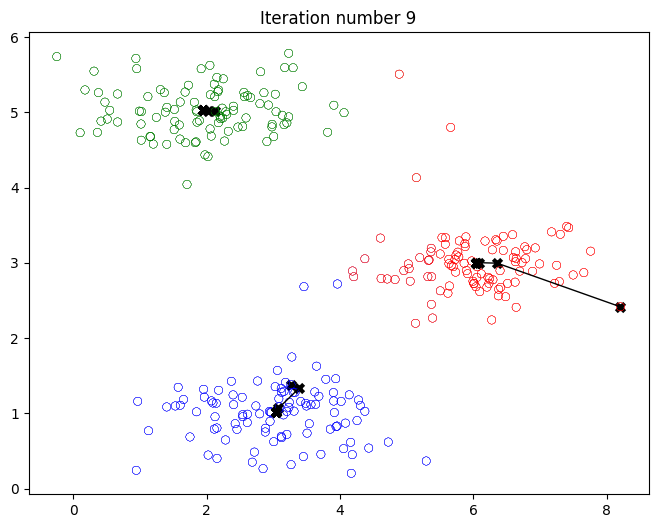

In [112]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [113]:


# Load an image of a bird
original_img = plt.imread('bird_small.png')



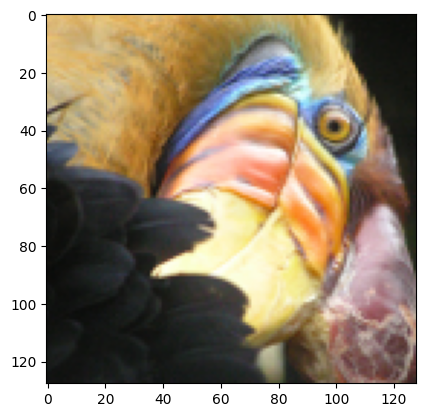

In [114]:
plt.imshow(original_image)

In [115]:
print("Shape of original_img is :" , original_img.shape)

Shape of original_img is : (128, 128, 3)


If you'll try this exercise later on a JPG file, you first need to divide the pixel values by 255 so it will be in the range 0 to 1. This is not necessary for PNG files (e.g. bird_small.png) because it is already loaded in the required range (as mentioned in the plt.imread() documentation). We commented a line below for this so you can just uncomment it later in case you want to try a different file.

In [116]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [117]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [118]:


print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])



Shape of idx: (16384,)
Closest centroid for the first five elements: [14 14 14 14 14]


AttributeError: 'Axes3D' object has no attribute 'w_yaxis'

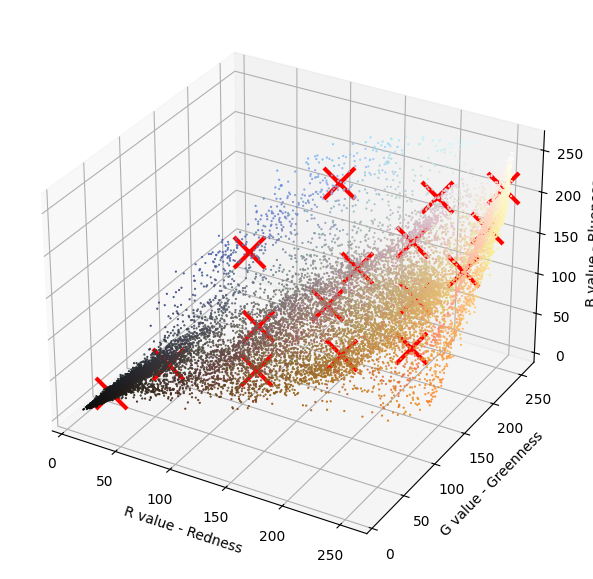

In [119]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

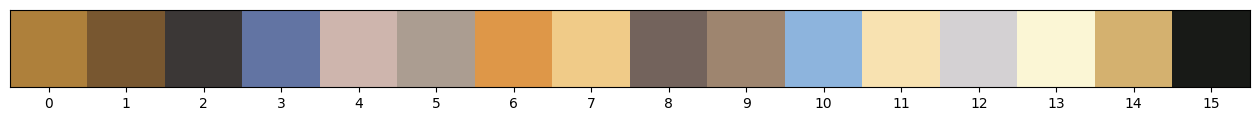

In [120]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

In [121]:


# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 



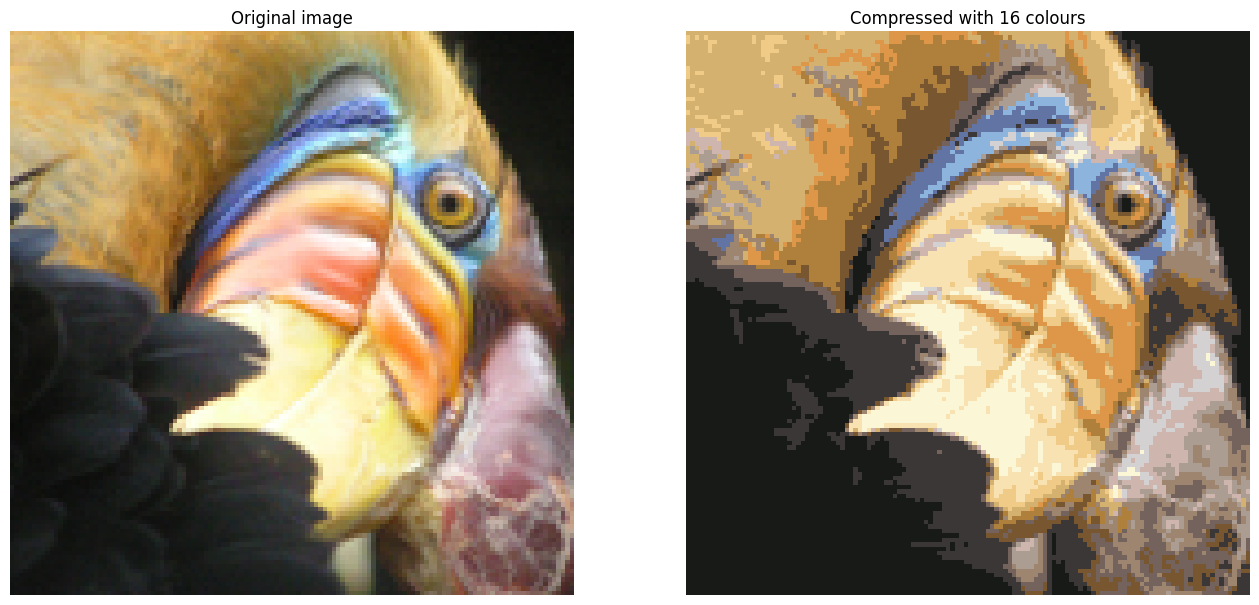

In [122]:
# Display the original image
fig, ax = plt.subplots(1, 2, figsize = (16, 16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original image')
ax[0].set_axis_off()

#Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()